# Python for Data Science: Gapminder Analysis

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
import math
%matplotlib inline
warnings.filterwarnings('ignore')

In [105]:
from scipy.stats import pearsonr, f_oneway, ttest_ind
import statsmodels.stats as sm
import statsmodels.api as sma
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('gapminder_clean.csv')
df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


In [4]:
df.shape

(2607, 20)

In [5]:
df.columns

Index(['Unnamed: 0', 'Country Name', 'Year',
       'Agriculture, value added (% of GDP)',
       'CO2 emissions (metric tons per capita)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Industry, value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Population density (people per sq. km of land area)',
       'Services, etc., value added (% of GDP)', 'pop', 'continent',
       'gdpPercap'],
      dtype='object')

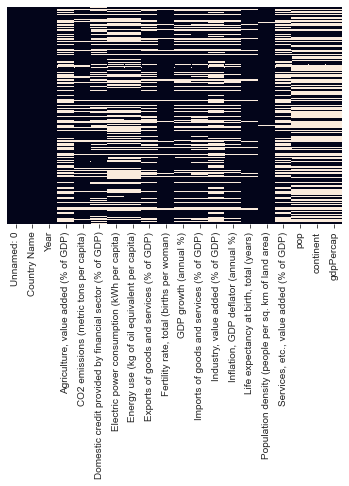

In [6]:
sns.set_style('ticks')
sns.heatmap(df.isna(), yticklabels=False, cbar=False)
plt.show()

## Part 1: Relationship between GDP per Capita and CO2 Emissions per Capita

In [7]:
df_1962 = df[df['Year'] == 1962][['Country Name', 'CO2 emissions (metric tons per capita)', 'gdpPercap']].dropna()
df_1962.columns = ['country_name', 'co2', 'gdp']

In [8]:
df_1962.head()

,country_name,co2,gdp
0,Afghanistan,0.073781,853.100710
10,Albania,1.439956,2312.888958
20,Algeria,0.484954,2550.816880
50,Angola,0.216025,4269.276742
80,Argentina,2.522392,7133.166023


In [9]:
df_1962['log_co2'] = np.log10(df_1962['co2'])
df_1962['log_gdp'] = np.log10(df_1962['gdp'])
df_1962

,country_name,co2,gdp,log_co2,log_gdp
0,Afghanistan,0.073781,853.100710,-1.132053,2.931000
10,Albania,1.439956,2312.888958,0.158349,3.364155
20,Algeria,0.484954,2550.816880,-0.314300,3.406679
50,Angola,0.216025,4269.276742,-0.665495,3.630354
80,Argentina,2.522392,7133.166023,0.401813,3.853282
...,...,...,...,...,...
2443,Uganda,0.059258,767.271740,-1.227251,2.884949
2473,United Kingdom,11.142928,12477.177070,1.046999,4.096116
2483,United States,16.013937,16173.145860,1.204498,4.208795
2503,Uruguay,1.540657,5603.357717,0.187706,3.748448


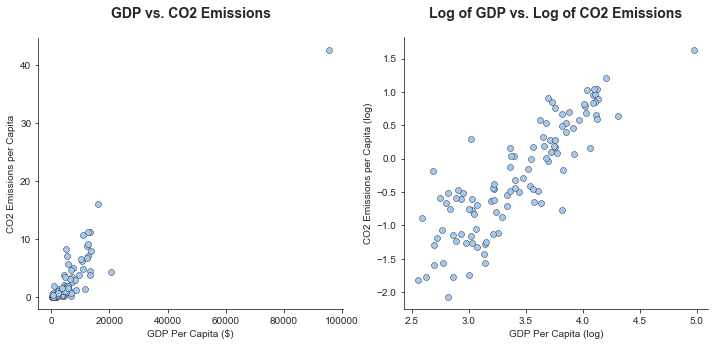

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.set_color_codes('pastel')
sns.scatterplot(x='gdp', y='co2', data=df_1962, ax=ax[0], color='b', edgecolor='.2')
ax[0].set(xlabel='GDP Per Capita ($)', ylabel='CO2 Emissions per Capita')
ax[0].set_title('GDP vs. CO2 Emissions', fontsize=14, fontweight='bold', y=1.05)

sns.set_color_codes('pastel')
sns.scatterplot(x='log_gdp', y='log_co2', data=df_1962, ax=ax[1], color='b', edgecolor='.2')
ax[1].set(xlabel='GDP Per Capita (log)', ylabel='CO2 Emissions per Capita (log)')
ax[1].set_title('Log of GDP vs. Log of CO2 Emissions', fontsize=14, fontweight='bold', y=1.05)
sns.despine()
plt.show()

In [12]:
r_log, p_log = pearsonr(df_1962['log_co2'], df_1962['log_gdp'])
print(f'R2 and p-value of log-plot: {round(r_log, 2)}, {p_log}')

R2 and p-value of log-plot: 0.86, 8.903567239714032e-33


In [13]:
filtered_df = df[['Year', 'CO2 emissions (metric tons per capita)', 'gdpPercap']].dropna()
filtered_df.columns = ['year', 'co2', 'gdppercap']
filtered_df['co2'] = np.log10(filtered_df['co2'])
filtered_df['gdppercap'] = np.log10(filtered_df['gdppercap'])
filtered_df.head()

,year,co2,gdppercap
0,1962,-1.132053,2.931000
1,1967,-0.907341,2.922309
2,1972,-0.883325,2.869221
3,1977,-0.737268,2.895485
4,1982,-0.780208,2.990344


In [14]:
correlation = filtered_df.groupby('year').corr('pearson').unstack()['co2']['gdppercap'].reset_index().rename(columns={'gdppercap':'gdp_co2_corr'})
correlation = correlation.sort_values('gdp_co2_corr', ascending=False)
print(f"The year {int(correlation.iloc[0]['year'])} has the highest correlation between GDP and CO2 Emissions: {round(correlation.iloc[0]['gdp_co2_corr'], 2)}")

The year 2002 has the highest correlation between GDP and CO2 Emissions: 0.93


In [15]:
df_2002 = df[df['Year'] == 2002][['Country Name', 'CO2 emissions (metric tons per capita)', 'gdpPercap', 'pop', 'continent']].dropna()
df_2002.columns = ['country', 'co2', 'gdp', 'pop', 'continent']
df_2002['co2'] = np.log10(df_2002['co2'])
df_2002['gdp'] = np.log10(df_2002['gdp'])
df_2002.head()

,country,co2,gdp,pop,continent
8,Afghanistan,-1.385849,2.861376,25268405.0,Asia
18,Albania,0.089743,3.663155,3508512.0,Europe
28,Algeria,0.453323,3.723295,31287142.0,Africa
58,Angola,-0.104454,3.442995,10866106.0,Africa
88,Argentina,0.517399,3.944366,38331121.0,Americas


In [35]:
hover_text = []
bubble_size = []

for index, row in df_2002.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'CO2 Emissions: {CO2}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Continent: {continent}').format(country=row['country'],
                                            CO2=round(10**(row['co2']), 2),
                                            gdp=round(10**(row['gdp']), 2),
                                            pop=row['pop'],
                                            continent=row['continent']))
    bubble_size.append(math.sqrt(row['pop']))


df_2002['text'] = hover_text
df_2002['size'] = bubble_size
sizeref = 2.*max(df_2002['size'])/(100**2)

continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2002.query("continent == '%s'" %continent)
                              for continent in continent_names}

fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdp'], y=continent['co2'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='GDP per Capita vs. CO2 Emissions per Capita in 2002',
    xaxis=dict(
        title='GDP per capita ($)',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emissions (Metric Tons per Capita)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

## Part 2: Relationship between Continent and Energy Use

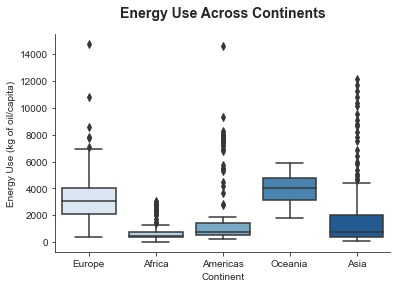

In [49]:
energy_use_df = df[['continent', 'Energy use (kg of oil equivalent per capita)']].dropna()

sns.boxplot(x='continent', y='Energy use (kg of oil equivalent per capita)', data=energy_use_df, palette="Blues")
plt.xlabel('Continent')
plt.ylabel('Energy Use (kg of oil/capita)')
plt.title('Energy Use Across Continents', fontsize=14, fontweight='bold', y=1.05)
sns.despine()
plt.show()

In [69]:
#One-Way ANOVA
F, p = f_oneway(energy_use_df['continent'] == 'Europe', energy_use_df['continent'] == 'Asia',
               energy_use_df['continent'] == 'Oceania', energy_use_df['continent'] == 'Africa',
               energy_use_df['continent'] == 'Americas')

print(f'F-Statistic: {round(F, 2)}, p-statistic: {p}')

F-Statistic: 60.89, p-statistic: 4.393829319284519e-50


In [77]:
tukey = sm.multicomp.pairwise_tukeyhsd(endog=energy_use_df['Energy use (kg of oil equivalent per capita)'],
                          groups=energy_use_df['continent'],
                          alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower     upper   reject
-------------------------------------------------------------
  Africa Americas 1005.1037  0.001  466.8321 1543.3753   True
  Africa     Asia 1168.7636  0.001  628.2524 1709.2747   True
  Africa   Europe 2447.5453  0.001 1947.3833 2947.7072   True
  Africa  Oceania 3281.7976  0.001 2040.3398 4523.2555   True
Americas     Asia  163.6599    0.9 -384.4165  711.7363  False
Americas   Europe 1442.4416  0.001  934.1136 1950.7696   True
Americas  Oceania  2276.694  0.001 1031.9237 3521.4642   True
    Asia   Europe 1278.7817  0.001  768.0828 1789.4806   True
    Asia  Oceania 2113.0341  0.001  867.2937 3358.7744   True
  Europe  Oceania  834.2524 0.3424 -394.5188 2063.0235  False
-------------------------------------------------------------


In [ ]:
'''
from statannot import add_stat_annotation

fig, ax = plt.subplots(figsize=(10,5))

order = ['Europe', 'Africa', 'Americas', 'Oceania', 'Asia']
sns.boxplot(x='continent', y='Energy use (kg of oil equivalent per capita)', data=energy_use_df, palette="Blues", order=order)
add_stat_annotation(ax, data=energy_use_df, x='continent', y='Energy use (kg of oil equivalent per capita)', order=order,
                    box_pairs=[('Africa', 'Americas'), ('Africa', 'Asia'), ('Africa', 'Europe'), ('Africa', 'Oceania'),
                                ('Americas', 'Europe'), ('Asia', 'Europe'), ('Asia', 'Oceania')],
                    test='t-test_ind',
                    text_format='star',
                    loc='outside')
plt.xlabel('Continent')
plt.ylabel('Energy Use (kg of oil/capita)')
plt.title('Energy Use Across Continents', fontsize=14, fontweight='bold', y=1.05)
sns.despine()
plt.show()
'''

## Part 3: Is there a significant difference between Europe and Asia with respect to Imports of Goods in the year after 1990?

In [93]:
import_df = df[(df['Year'] > 1990)]
import_df = import_df[(df['continent'] == 'Europe') | (df['continent'] == 'Asia')].dropna()
import_df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
17,17,Albania,1997,32.700160,0.490365,54.045926,680.688922,384.594958,9.745654,2.423,-10.837856,34.189995,15.377651,12.088706,72.898098,114.900766,51.922189,3428038.0,Europe,3193.054604
18,18,Albania,2002,24.235933,1.229541,47.193912,1561.122382,645.080154,19.598874,1.975,4.231371,44.335366,19.596072,2.410590,75.154610,111.350730,56.167995,3508512.0,Europe,4604.211737
19,19,Albania,2007,19.874798,1.322335,62.076755,1213.124369,679.861765,28.084222,1.635,5.900000,54.788201,25.334355,3.576195,76.470293,108.394781,54.790848,3600523.0,Europe,5937.029526
126,126,Austria,1992,2.771376,7.226236,118.077539,6227.498049,3239.063967,33.235331,1.510,2.093525,34.528976,32.744402,3.479093,75.817073,94.946827,64.484223,7914969.0,Europe,27042.018680
127,127,Austria,1997,2.147733,7.863668,128.165675,6620.447862,3542.521430,37.109505,1.390,2.205020,37.883464,32.155746,1.160828,77.319512,96.488750,65.696521,8069876.0,Europe,29095.920660


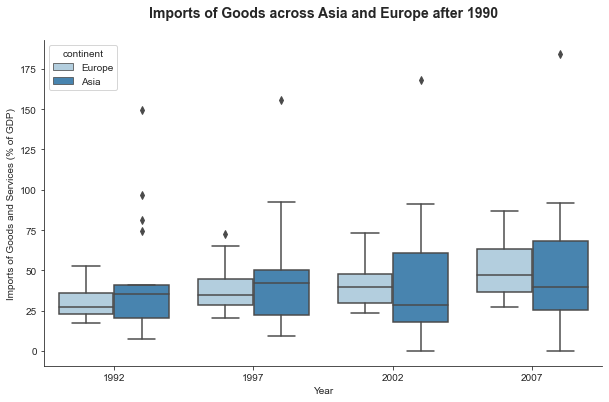

In [103]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x='Year', y='Imports of goods and services (% of GDP)', hue='continent', data=import_df, palette='Blues')
plt.xlabel('Year')
plt.ylabel('Imports of Goods and Services (% of GDP)')
plt.title('Imports of Goods across Asia and Europe after 1990', fontsize=14, fontweight='bold', y=1.05)
sns.despine()
plt.show()

## Part 4: What is the country with the highest population density across all years?

In [114]:
pop_df = df[['Year', 'Country Name', 'Population density (people per sq. km of land area)']].dropna().rename(columns={'Population density (people per sq. km of land area)': 'pop_density'})

In [247]:
highest_pop = pop_df.groupby(['Year','Country Name']).mean()
highest_pop = highest_pop.sort_values('pop_density', ascending=False).sort_index(level='Year', sort_remaining=False).reset_index()
highest_pop

,Year,Country Name,pop_density
0,1962,Monaco,11521.000000
1,1962,"Macao SAR, China",9051.250000
2,1962,"Hong Kong SAR, China",3240.392157
3,1962,Singapore,2612.238806
4,1962,Gibraltar,2213.300000
...,...,...,...
2553,2007,Iceland,3.107890
2554,2007,Australia,2.711115
2555,2007,Namibia,2.530304
2556,2007,Mongolia,1.668926


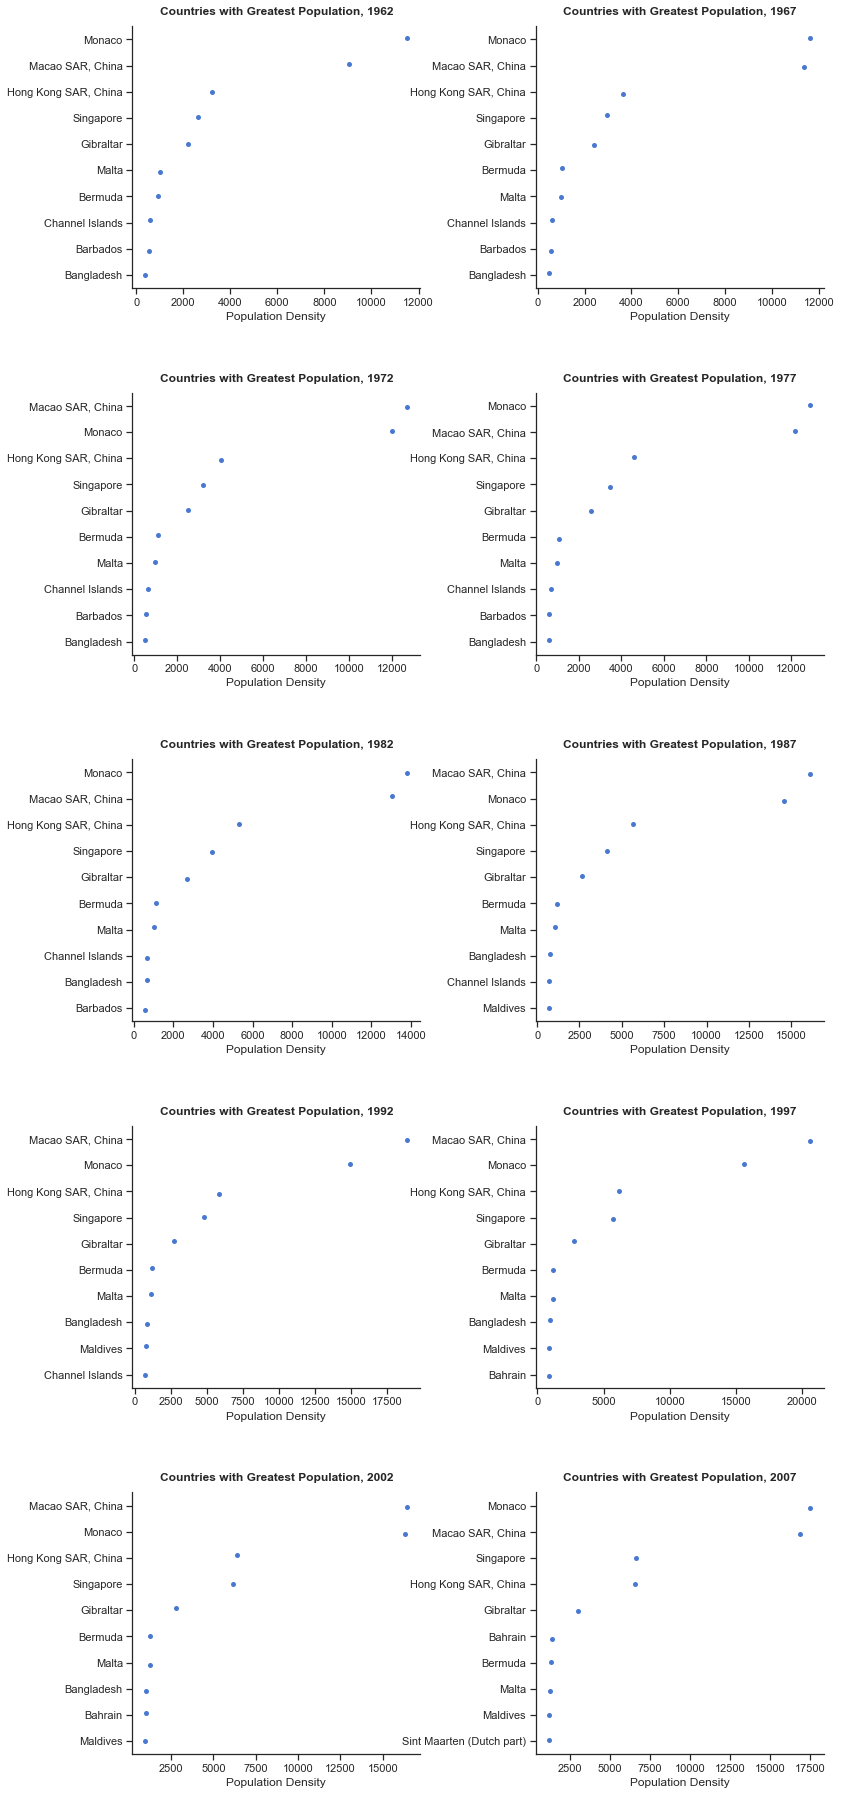

In [279]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,30))

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1962][:10], color='b', edgecolor='1', ax=ax[0][0])
ax[0][0].set(xlabel="Population Density", ylabel="")
ax[0][0].set_title('Countries with Greatest Population, 1962', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1967][:10], color='b', edgecolor='1', ax=ax[0][1])
ax[0][1].set(xlabel="Population Density", ylabel="")
ax[0][1].set_title('Countries with Greatest Population, 1967', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1972][:10], color='b', edgecolor='1', ax=ax[1][0])
ax[1][0].set(xlabel="Population Density", ylabel="")
ax[1][0].set_title('Countries with Greatest Population, 1972', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1977][:10], color='b', edgecolor='1', ax=ax[1][1])
ax[1][1].set(xlabel="Population Density", ylabel="")
ax[1][1].set_title('Countries with Greatest Population, 1977', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1982][:10], color='b', edgecolor='1', ax=ax[2][0])
ax[2][0].set(xlabel="Population Density", ylabel="")
ax[2][0].set_title('Countries with Greatest Population, 1982', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1987][:10], color='b', edgecolor='1', ax=ax[2][1])
ax[2][1].set(xlabel="Population Density", ylabel="")
ax[2][1].set_title('Countries with Greatest Population, 1987', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1992][:10], color='b', edgecolor='1', ax=ax[3][0])
ax[3][0].set(xlabel="Population Density", ylabel="")
ax[3][0].set_title('Countries with Greatest Population, 1992', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 1997][:10], color='b', edgecolor='1', ax=ax[3][1])
ax[3][1].set(xlabel="Population Density", ylabel="")
ax[3][1].set_title('Countries with Greatest Population, 1997', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 2002][:10], color='b', edgecolor='1', ax=ax[4][0])
ax[4][0].set(xlabel="Population Density", ylabel="")
ax[4][0].set_title('Countries with Greatest Population, 2002', fontsize=12, fontweight='bold', y=1.02)

sns.stripplot(x='pop_density', y='Country Name', data=highest_pop[highest_pop['Year'] == 2007][:10], color='b', edgecolor='1', ax=ax[4][1])
ax[4][1].set(xlabel="Population Density", ylabel="")
ax[4][1].set_title('Countries with Greatest Population, 2007', fontsize=12, fontweight='bold', y=1.02)

sns.despine()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


## Part 5: Which countries have the greatest increase in life expectancy?

In [296]:
life_exp_1962 = df[['Country Name', 'Life expectancy at birth, total (years)']][life_exp['Year'] == 1962].dropna().rename(columns={'Life expectancy at birth, total (years)':'life_exp_1962'})
life_exp_2007 = df[['Country Name', 'Life expectancy at birth, total (years)']][life_exp['Year'] == 2007].dropna().rename(columns={'Life expectancy at birth, total (years)':'life_exp_2007'})




In [293]:
len(life_exp_1962['Country Name'])

236

In [286]:
len(life_exp_2007['Country Name'])

248

In [299]:
diff_life_exp = pd.merge(life_exp_1962, life_exp_2007, on='Country Name', how='inner')
diff_life_exp['diff'] = diff_life_exp['life_exp_2007'] - diff_life_exp['life_exp_1962']

In [303]:
highest_lifeexp = diff_life_exp.sort_values('diff', ascending=False)[:10]

In [304]:
highest_lifeexp

,Country Name,life_exp_1962,life_exp_2007,diff
136,Maldives,38.483561,75.399707,36.916146
20,Bhutan,33.094146,66.293098,33.198951
213,Timor-Leste,34.739049,65.824195,31.085146
217,Tunisia,43.341683,74.202439,30.860756
164,Oman,44.300512,75.123610,30.823098
154,Nepal,35.952293,66.551927,30.599634
39,China,44.398341,74.340439,29.942098
233,"Yemen, Rep.",34.739561,61.954805,27.215244
184,Saudi Arabia,46.694512,73.345073,26.650561
100,"Iran, Islamic Rep.",46.065805,72.674195,26.608390


In [ ]:

ax = sns.stripplot(data=highest_lifeexp,x='',hue='gender',y='variable', size=10, linewidth=1)

lines = ([[x, n] for n in group] for x, (_, group) in enumerate(df.groupby(['city'], sort = False)['variable']))
lc = mc.LineCollection(lines, colors='red', linewidths=2)    
ax.add_collection(lc)

sns.plt.show()